# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [8]:
#Resposta letra A

import numpy as np
import pandas as pd

# Matriz com os dados originais
X = df[['p1', 'p2']].to_numpy()  # n x 2

# Transformação: [p1, p2] -> [media, diferenca]
# media = 0.5*p1 + 0.5*p2
# diferenca = 1*p1 + (-1)*p2
B = np.array([
    [0.5,  1.0],
    [0.5, -1.0]
])

Y = X @ B  # n x 2

df_md = pd.DataFrame(Y, columns=['media', 'diferenca'])

print(f"df_md criado com formato: {df_md.shape}")
df_md.head()



df_md criado com formato: (50, 2)


,media,diferenca
0,7.454060,-0.978736
1,3.980465,-2.238143
2,1.621472,1.294085
3,4.993754,1.038788
4,8.066546,-1.743712


In [9]:
#Resposta letra B

corr_p1p2 = df['p1'].corr(df['p2'])

print("Correlação entre p1 e p2:", corr_p1p2)
df.head()


Correlação entre p1 e p2: 0.8957365818728042


,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [10]:
#Resposta letra C

corr_md = df_md['media'].corr(df_md['diferenca'])

print("Correlação entre média e diferença:", corr_md)
df_md.head()

Correlação entre média e diferença: -0.1334738541178884


,media,diferenca
0,7.454060,-0.978736
1,3.980465,-2.238143
2,1.621472,1.294085
3,4.993754,1.038788
4,8.066546,-1.743712


**Resposta letra D:**

- A correlação entre **p1 e p2** tende a ser alta, porque **p2 foi criada a partir de p1** com um ruído normal pequeno (e ainda com cortes em 0 e 10).
- Quando eu transformo para **média** e **diferença**, a correlação cai bastante (fica bem mais próxima de 0), porque:
  - a **média** captura o “nível geral” das notas,
  - e a **diferença** captura principalmente o “quanto uma prova se afastou da outra” (o ruído).
- Ou seja, a transformação ajuda a “separar” informação comum (média) de variação/erro (diferença), reduzindo a correlação entre as novas variáveis.


## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [11]:
# Transformação: [p1, p2] -> [soma, diferenca] via multiplicação matricial
X = df[['p1', 'p2']].to_numpy()

B2 = np.array([
    [1.0,  1.0],   # soma = p1 + p2
    [1.0, -1.0]    # diferenca = p1 - p2
])

Y2 = X @ B2
df_sd = pd.DataFrame(Y2, columns=['soma', 'diferenca'])

corr_sd = df_sd['soma'].corr(df_sd['diferenca'])

print("Correlação entre soma e diferença:", corr_sd)
df_sd.head()


Correlação entre soma e diferença: -0.1334738541178884


,soma,diferenca
0,14.908120,-0.978736
1,7.960930,-2.238143
2,3.242944,1.294085
3,9.987507,1.038788
4,16.133092,-1.743712


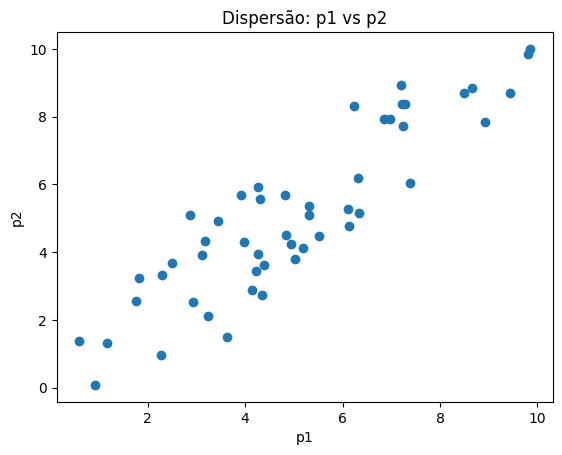

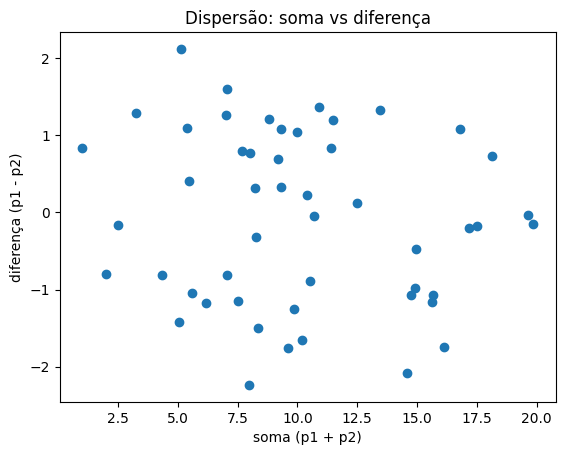

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['p1'], df['p2'])
plt.title("Dispersão: p1 vs p2")
plt.xlabel("p1")
plt.ylabel("p2")
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

plt.figure()
plt.scatter(df_sd['soma'], df_sd['diferenca'])
plt.title("Dispersão: soma vs diferença")
plt.xlabel("soma (p1 + p2)")
plt.ylabel("diferença (p1 - p2)")
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()


### Conclusão

A correlação entre **p1** e **p2** foi **alta** (≈ **0,8957**), o que era esperado, pois **p2 foi construída a partir de p1** com a adição de um ruído normal pequeno e ainda houve corte dos valores no intervalo \[0, 10\].  

Após a transformação linear, a correlação entre as variáveis transformadas diminuiu bastante e ficou **mais próxima de zero**. No caso de **média vs diferença**, a correlação foi ≈ **-0,1335**, indicando que as novas variáveis estão bem menos associadas do que as originais. Isso ocorre porque a **média** representa o “nível geral” das notas, enquanto a **diferença** captura principalmente o desvio entre as provas (o ruído).

Na etapa de **soma vs diferença**, a correlação também ficou ≈ **-0,1335**. Esse resultado é coerente, porque a **soma** é apenas uma reescala da média (soma = 2 × média) e **a correlação não muda quando multiplicamos uma variável por uma constante positiva**.  

Visualmente, o gráfico de dispersão **p1 vs p2** apresenta uma tendência crescente clara (refletindo correlação alta), enquanto o gráfico **soma vs diferença** forma uma nuvem com **menor inclinação aparente**, reforçando a ideia de que a transformação separa informação comum (soma/média) do componente de variação (diferença), reduzindo a dependência entre as variáveis.
